In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, accuracy_score
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score, precision_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from tensorflow.keras.models import  Sequential,Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Flatten, BatchNormalization, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

In [3]:
cc = pd.read_csv("creditcard.csv",sep = ',')
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#General Descriptive Statistics
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0, 0.5, 'Frequency')

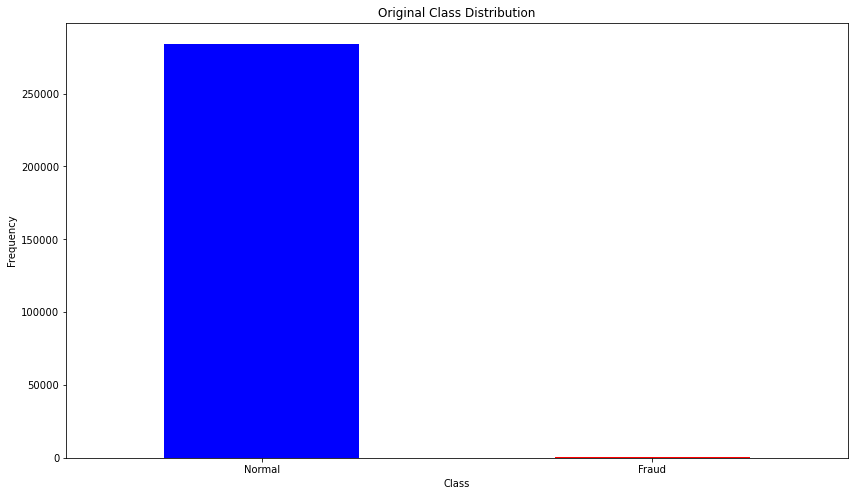

In [5]:
# A bar graph representing the normal and fraud transactions in the dataset

LABELS = ["Normal", "Fraud"]
rcParams['figure.figsize'] = 14,8
count_classes = cc.value_counts(cc['Class'], sort = True)
count_classes.plot(kind = 'bar',  color = ['blue', 'red'], rot = 0)
plt.title("Original Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [6]:
#The number and percentage of fraud transactions in the dataset
neg, pos = np.bincount(cc['Class'])
total = neg + pos
print('Total: {}\n Fraud: {} ({:.3f}% of total)\n'.format(total, pos, 100*pos / total))

Total: 284807
 Fraud: 492 (0.173% of total)



In [7]:
cc.mean()

Time      9.481386e+04
V1        3.918649e-15
V2        5.682686e-16
V3       -8.761736e-15
V4        2.811118e-15
V5       -1.552103e-15
V6        2.040130e-15
V7       -1.698953e-15
V8       -1.893285e-16
V9       -3.147640e-15
V10       1.772925e-15
V11       9.289524e-16
V12      -1.803266e-15
V13       1.674888e-15
V14       1.475621e-15
V15       3.501098e-15
V16       1.392460e-15
V17      -7.466538e-16
V18       4.258754e-16
V19       9.019919e-16
V20       5.126845e-16
V21       1.473120e-16
V22       8.042109e-16
V23       5.282512e-16
V24       4.456271e-15
V25       1.426896e-15
V26       1.701640e-15
V27      -3.662252e-16
V28      -1.217809e-16
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64

In [8]:
cc.median()

Time      84692.000000
V1            0.018109
V2            0.065486
V3            0.179846
V4           -0.019847
V5           -0.054336
V6           -0.274187
V7            0.040103
V8            0.022358
V9           -0.051429
V10          -0.092917
V11          -0.032757
V12           0.140033
V13          -0.013568
V14           0.050601
V15           0.048072
V16           0.066413
V17          -0.065676
V18          -0.003636
V19           0.003735
V20          -0.062481
V21          -0.029450
V22           0.006782
V23          -0.011193
V24           0.040976
V25           0.016594
V26          -0.052139
V27           0.001342
V28           0.011244
Amount       22.000000
Class         0.000000
dtype: float64

In [9]:
cc.mode()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,163152.0,1.245674,-0.326668,-2.752041,-0.842316,-0.562777,-1.011073,-0.432126,-0.160211,0.170362,...,-0.262581,-0.816264,0.020675,0.357827,0.186423,-0.398828,-0.035866,-0.060282,1.0,0.0
1,NaN,2.055797,0.166975,0.488306,0.635322,2.463072,3.173856,0.014953,0.727706,0.608606,...,0.269765,0.844627,0.140304,0.726212,0.366624,0.096544,0.027735,0.018495,NaN,NaN


In [10]:
cc.duplicated(subset=None, keep= 'first')

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [11]:
cc.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#Standardising the dataset

cc['Time'] = StandardScaler().fit_transform(cc['Time'].values.reshape(-1,1))
cc['Amount'] = StandardScaler().fit_transform(cc['Amount'].values.reshape(-1,1))

In [13]:
#Dividing the dataset into independent instances(from Time-Amount) and dependent instances(Class)

X = cc.drop(['Class'], axis =1)
y = cc['Class']

In [14]:
#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [15]:
#Balancing the train dataset
from mahakil import *
mahak = MAHAKIL()
x_re, y_re = mahak.fit_sample(X_train,y_train)

173.0


In [16]:
x_re.shape, y_re.shape

((375665, 30), (375665,))

In [17]:
#comparing the 'Class' of the original dataset and the 'Class' of the resampled dataset
from collections import Counter
print('Train dataset shape{}'.format(Counter(y_train)))
print('Resampled Train dataset shape{}'.format(Counter(y_re)))

Train dataset shapeCounter({0: 199019, 1: 345})
Resampled Train dataset shapeCounter({0: 199019, 1: 176646})


In [18]:
# The number of normal and fraudulent transactions in the test dataset
from collections import Counter
print('Test dataset shape{}'.format(Counter(y_test)))

Test dataset shapeCounter({0: 85296, 1: 147})


Text(0, 0.5, 'Frequency')

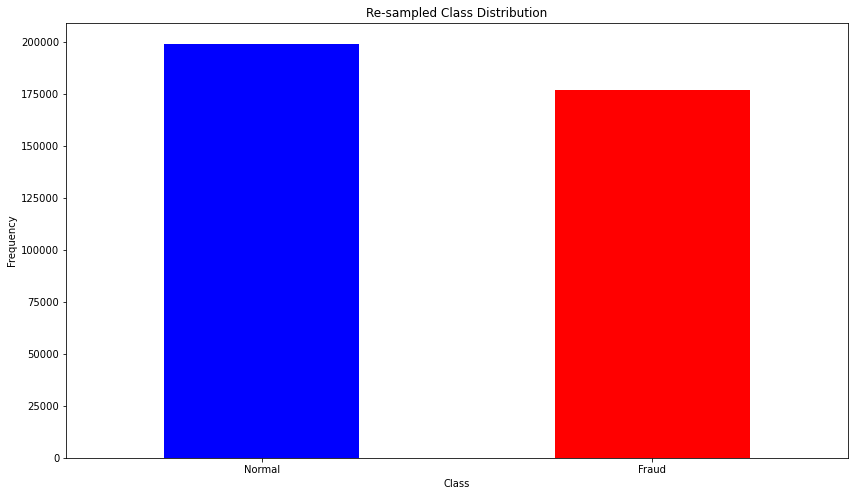

In [19]:
# A bar graph representing the new balanced train dataset
count_classes = pd.value_counts(y_re, sort = True)
count_classes.plot(kind = 'bar', color = ['blue', 'red'], rot = 0)
plt.title("Re-sampled Class Distribution")
plt.xticks(range(2), LABELS,)

plt.xlabel("Class")
plt.ylabel("Frequency")

In [20]:
X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=float)


In [21]:
#Reshaping the train and test dataset to meet the requirements of the CNN and LSTM model

Xtrain = x_re.reshape(x_re.shape[0], x_re.shape[1], 1)
Xtest =  X_test.reshape( X_test.shape[0],  X_test.shape[1], 1)


In [22]:
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
cvscores = []


In [21]:
#The CNN Model
for train, test in kfold.split(Xtrain, y_re):
    
    
    
    x_train = Xtrain[train]
    y_train = y_re[train]
    x_traintest = Xtrain[test]
    y_traintest = y_re[test]
    
    
    model1 = Sequential()
    model1.add(Conv1D(32, 2, activation='relu', input_shape = x_train[0].shape))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.2))

    model1.add(Conv1D(64, 2, activation='relu'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))

    model1.add(Flatten())
    model1.add(Dense(64, activation='relu'))
    model1.add(Dropout(0.5)) 

    model1.add(Dense(1, activation='sigmoid'))




    model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


    

  # Fit data to model
    history = model1.fit(x_train, y_train,validation_data=(x_traintest,y_traintest),epochs=5,verbose=1)
    
    
    scores = model1.evaluate(x_traintest, y_traintest, verbose=0)
    print("%s: %.4f%%" % (model1.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
    

Epoch 1/5
10566/10566 [==============================] - 78s 7ms/step - loss: 0.0289 - accuracy: 0.9915 - val_loss: 0.0089 - val_accuracy: 0.9977
Epoch 2/5
10566/10566 [==============================] - 73s 7ms/step - loss: 0.0161 - accuracy: 0.9956 - val_loss: 0.0056 - val_accuracy: 0.9991
Epoch 3/5
10566/10566 [==============================] - 74s 7ms/step - loss: 0.0139 - accuracy: 0.9964 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 4/5
10566/10566 [==============================] - 73s 7ms/step - loss: 0.0127 - accuracy: 0.9967 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 5/5
10566/10566 [==============================] - 74s 7ms/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.0034 - val_accuracy: 0.9994
accuracy: 99.9388%
Epoch 1/5
10566/10566 [==============================] - 75s 7ms/step - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.0085 - val_accuracy: 0.9980
Epoch 2/5
10566/10566 [==============================] - 74s 7ms/step - loss: 0.0152 - accuracy: 0.9958 -

In [22]:
y_pred = model1.predict(Xtest)
y_pred = (y_pred>0.5)

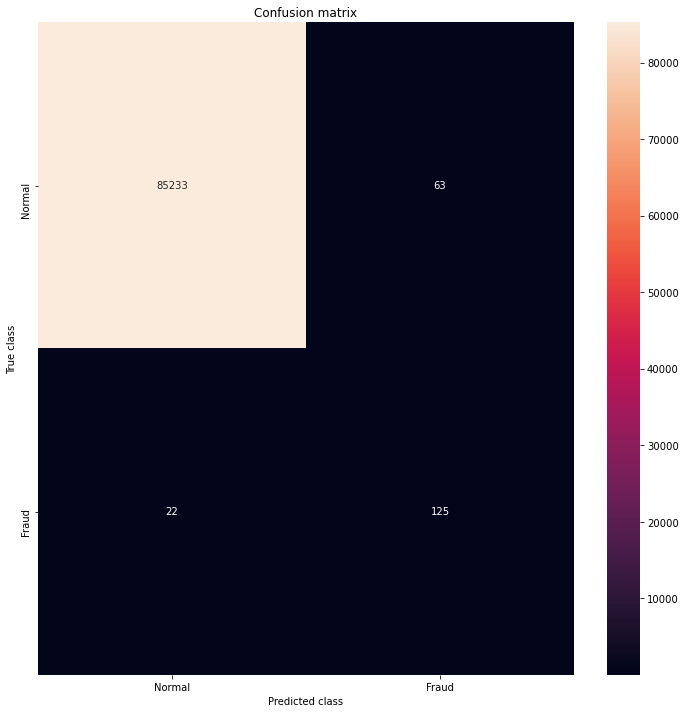

In [23]:
#The confusion matrix for the CNN model

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class')
plt.xlabel('Predicted class') 
plt.show()

In [24]:
accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
f1score1 = f1_score(y_test, y_pred) 
recallScore1 = recall_score(y_test, y_pred)
print('Accuracy: %f' % accuracy1)
print('Precision: %f' % precision1)
print('F1 score: %f' % f1score1)
print('Recall score: %f' % recallScore1)

Accuracy: 0.999005
Precision: 0.664894
F1 score: 0.746269
Recall score: 0.850340


In [25]:
#The LSTM model
for train, test in kfold.split(Xtrain, y_re):
    
    x_train = Xtrain[train]
    y_train = y_re[train]
    x_traintest = Xtrain[test]
    y_traintest = y_re[test]
    

    model2 = Sequential()

    model2.add(LSTM(20, input_shape=Xtrain.shape[1:], kernel_initializer='lecun_uniform', activation='relu',
    kernel_regularizer=regularizers.l1(0.1), 
    recurrent_regularizer=regularizers.l1(0.01), bias_regularizer=None, 
    activity_regularizer=None, dropout=0.2, recurrent_dropout=0.2))

    model2.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))

    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model2.fit(x_train, y_train,validation_data=(x_traintest,y_traintest),epochs=5,verbose=1)
    
    scores = model2.evaluate(x_traintest, y_traintest, verbose=0)
    print("%s: %.4f%%" % (model2.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    

Epoch 1/5
10566/10566 [==============================] - 229s 21ms/step - loss: 1.6611 - accuracy: 0.9379 - val_loss: 0.2275 - val_accuracy: 0.9486
Epoch 2/5
10566/10566 [==============================] - 232s 22ms/step - loss: 0.2163 - accuracy: 0.9399 - val_loss: 0.1922 - val_accuracy: 0.9453
Epoch 3/5
10566/10566 [==============================] - 227s 21ms/step - loss: 0.2006 - accuracy: 0.9424 - val_loss: 0.1783 - val_accuracy: 0.9516
Epoch 4/5
10566/10566 [==============================] - 227s 21ms/step - loss: 0.1960 - accuracy: 0.9433 - val_loss: 0.1842 - val_accuracy: 0.9450
Epoch 5/5
10566/10566 [==============================] - 227s 21ms/step - loss: 0.1936 - accuracy: 0.9429 - val_loss: 0.2131 - val_accuracy: 0.9353
accuracy: 93.5316%
Epoch 1/5
10566/10566 [==============================] - 227s 21ms/step - loss: 0.7776 - accuracy: 0.9364 - val_loss: 0.1905 - val_accuracy: 0.9491
Epoch 2/5
10566/10566 [==============================] - 225s 21ms/step - loss: 0.2120 - accu

In [26]:
y_pred1 = model2.predict(Xtest)
y_pred1 = (y_pred1>0.5)

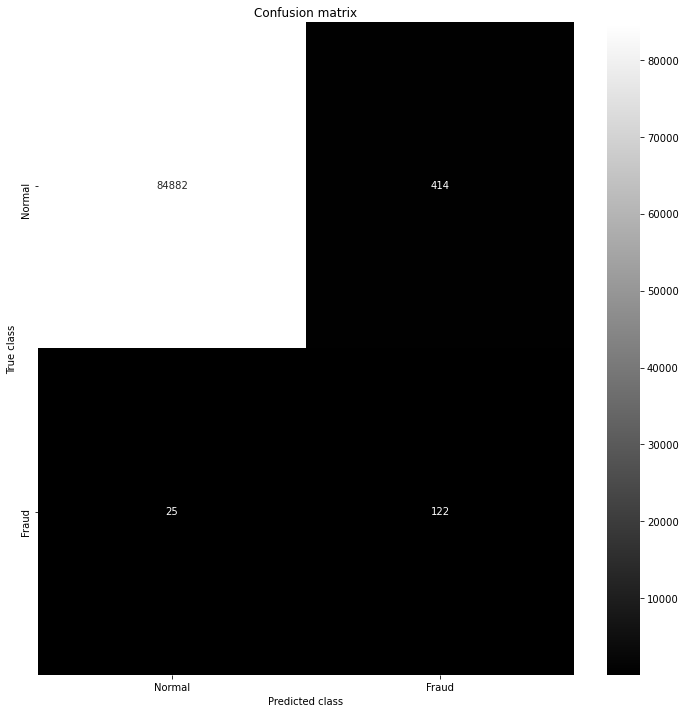

In [27]:
#The confusion matrix for the LSTM model

LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_pred1) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d",cmap = 'gist_gray'); 
plt.title("Confusion matrix") 
plt.ylabel('True class')
plt.xlabel('Predicted class') 
plt.show()

In [28]:
accuracy2 = accuracy_score(y_test, y_pred1)
precision2 = precision_score(y_test, y_pred1)
f1score2 = f1_score(y_test, y_pred1)
recallScore2 = recall_score(y_test, y_pred1)
print('Accuracy: %f' % accuracy2)
print('Precision: %f' % precision2)
print('F1 score: %f' % f1score2)
print('Recall score: %f' % recallScore2)

Accuracy: 0.994862
Precision: 0.227612
F1 score: 0.357247
Recall score: 0.829932


In [33]:
# The Autoencoder Model

for train, test in kfold.split(x_re, y_re):
    
    x_train = x_re[train]
    y_train = y_re[train]
    x_traintest = x_re[test]
    y_traintest = y_re[test]
    
    
    nb_epoch = 5
    batch_size = 128
    input_dim = x_train.shape[1] #num of columns, 30
    encoding_dim = 14
    hidden_dim = int(encoding_dim / 2) #i.e. 7
    learning_rate = 1e-7

    input_layer = Input(shape=(input_dim, ))
    encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(hidden_dim, activation="relu")(encoder)
    decoder = Dense(hidden_dim, activation='tanh')(encoder)
    decoder = Dense(input_dim, activation='relu')(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    
    autoencoder.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')
    
    cp = ModelCheckpoint(filepath="autoencoder1_fraud.h5", save_best_only=True, verbose=0)

    tb = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)
    
    
    history = autoencoder.fit(x_train, x_train, epochs=nb_epoch, batch_size=batch_size, shuffle=True, 
                          validation_data=(x_traintest, x_traintest), verbose=1, callbacks=[cp, tb]).history
    
    
    scores = autoencoder.evaluate(x_traintest, x_traintest, verbose=0)
    print("%s: %.4f%%" % (autoencoder.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
    

Epoch 1/5
2642/2642 [==============================] - 21s 4ms/step - loss: 9.8899 - accuracy: 0.3973 - val_loss: 9.4205 - val_accuracy: 0.5420
Epoch 2/5
2642/2642 [==============================] - 4s 2ms/step - loss: 9.4079 - accuracy: 0.5813 - val_loss: 9.2403 - val_accuracy: 0.6258
Epoch 3/5
2642/2642 [==============================] - 5s 2ms/step - loss: 9.2990 - accuracy: 0.6632 - val_loss: 9.1790 - val_accuracy: 0.6832
Epoch 4/5
2642/2642 [==============================] - 5s 2ms/step - loss: 9.2658 - accuracy: 0.6939 - val_loss: 9.1570 - val_accuracy: 0.7040
Epoch 5/5
2642/2642 [==============================] - 6s 2ms/step - loss: 9.2504 - accuracy: 0.7065 - val_loss: 9.1461 - val_accuracy: 0.7126
accuracy: 71.2647%
Epoch 1/5
2642/2642 [==============================] - 8s 2ms/step - loss: 9.8190 - accuracy: 0.3805 - val_loss: 9.3801 - val_accuracy: 0.5488
Epoch 2/5
2642/2642 [==============================] - 5s 2ms/step - loss: 9.4101 - accuracy: 0.5927 - val_loss: 9.2499 - 

In [34]:
test_x_predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})

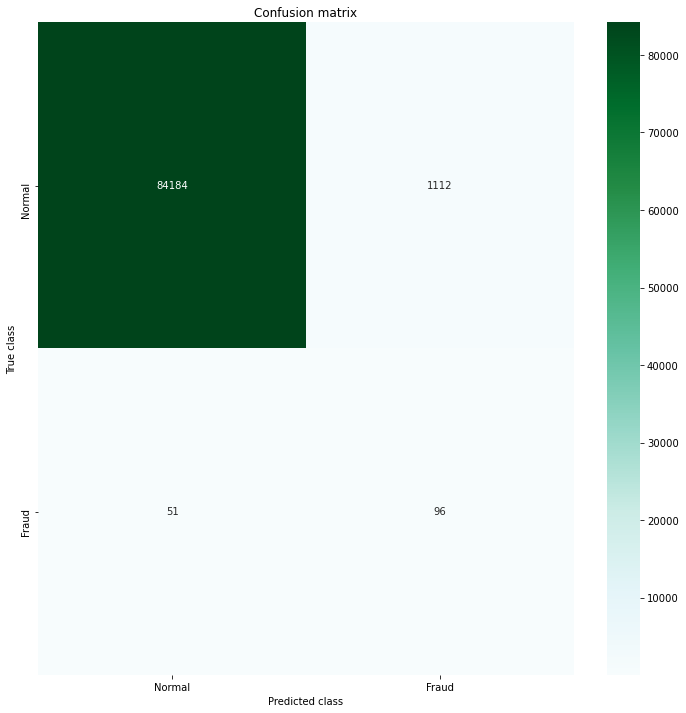

In [35]:
#The confusion matrix for the Autoencoder model

threshold_fixed = 5
LABELS = ["Normal","Fraud"]
y_pred2 = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, y_pred2)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",cmap = 'BuGn');
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [36]:
accuracy3 = accuracy_score(y_test, y_pred2)
precision3 = precision_score(y_test, y_pred2)
f1score3 = f1_score(y_test, y_pred2)
recallScore3 = recall_score(y_test, y_pred2) 
print('Accuracy: %f' % accuracy3)
print('Precision: %f' % precision3)
print('F1 score: %f' % f1score3)
print('Recall score: %f' % recallScore3)

Accuracy: 0.986389
Precision: 0.079470
F1 score: 0.141697
Recall score: 0.653061
